In [37]:

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import minmax_scale

from sklearn.multioutput import RegressorChain
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.model_selection import learning_curve
import pandas as pd



In [23]:
train_df = pd.read_csv('../data/ML-CUP20-TR .csv')
test_df = pd.read_csv('../data/ML-CUP20-TS.csv')

# Spilitting the targets and input features
train_x = train_df.iloc[:,:-2].to_numpy()
train_y = train_df.iloc[:,[10,11]].to_numpy()


In [24]:
x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.4, random_state=30)

In [25]:
knn_model = Pipeline(steps = [('scale', StandardScaler(with_mean=True, with_std=True)),
                             ('estimator', RegressorChain(KNeighborsRegressor(n_neighbors=4), order=[0,1]))])
et_regressor = Pipeline(steps = [('scale', StandardScaler()),
                             ('estimator', RegressorChain(ExtraTreeRegressor(random_state=0), order=[0,1]))])
dt_regressor = Pipeline(steps = [('scale', StandardScaler(with_mean=True, with_std=True)),
                             ('estimator', RegressorChain(DecisionTreeRegressor(random_state=0), order=[0,1]))])
direct_svr = Pipeline(steps = [('scale', StandardScaler(with_mean=True, with_std=True)),
                             ('estimator', MultiOutputRegressor(SVR(kernel='rbf',C=0.1,  gamma='scale',epsilon=0.1)))])
chin_svr = Pipeline(steps = [('scale', StandardScaler(with_mean=True, with_std=True)),
                             ('estimator', RegressorChain(SVR(kernel='rbf',C=0.1,  gamma='scale',epsilon=0.1)))])


In [28]:
knn_params={
          'estimator__base_estimator__n_neighbors':[5,6,7,8,9,10],    
          'estimator__base_estimator__leaf_size':[1,2,3,5],
          'estimator__base_estimator__weights':['uniform', 'distance'],
          'estimator__base_estimator__algorithm':['auto', 'ball_tree','kd_tree','brute']
           }

er_params={   'estimator__base_estimator__criterion': ['mse', 'mae','poisson','friedman_mse'], 
              'estimator__base_estimator__min_samples_split': [10, 20, 40,'best'],
              'estimator__base_estimator__max_depth': [2, 6, 8],
              'estimator__base_estimator__min_samples_leaf': [20, 40, 100],
              'estimator__base_estimator__max_leaf_nodes': [5, 20, 100],
          }

dt_params = {
    'estimator__base_estimator__criterion': ['mse', 'mae','poisson','friedman_mse'],
    'estimator__base_estimator__min_samples_split': [10, 20, 40,'best'],
    'estimator__base_estimator__max_depth': [2, 6, 8],
    'estimator__base_estimator__min_samples_leaf': [20, 40, 100],
    'estimator__base_estimator__max_leaf_nodes': [5, 20, 100]
          }

dsvr_params={
    'estimator__estimator__kernel': ["rbf"],
    'estimator__estimator__C': np.logspace(-3, 2, 6).tolist(),
    'estimator__estimator__gamma':[0.0001, 0.001, 0.01, 0.1],
    'estimator__estimator__epsilon': np.logspace(-3, 2, 6).tolist()}
chinesvr_params={
    'estimator__base_estimator__kernel': ["rbf"],
    'estimator__base_estimator__gamma': [0.0001, 0.001, 0.01, 0.1],
    'estimator__base_estimator__C': np.logspace(-3, 2, 6,8).tolist(),
    'estimator__base_estimator__epsilon': np.logspace(-3, 2, 6,8).tolist()}

In [29]:
# list of models
regression_models = [knn_model,et_regressor,dt_regressor,direct_svr,chin_svr]
parameters_list=[knn_params, er_params, dt_params, dsvr_params,chinesvr_params]
model_log=["_knn", "_et","_dt", "_dsrv", "_chinSvr"]

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 400 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 1680 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed:    5.9s finished


Best parameters:{'estimator__base_estimator__algorithm': 'auto', 'estimator__base_estimator__leaf_size': 1, 'estimator__base_estimator__n_neighbors': 9, 'estimator__base_estimator__weights': 'distance'}
Best training accuracy:-8.331988657486633
Test set accuracy score for best params:0.9478572026236229
Best model Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('estimator',
                 RegressorChain(base_estimator=KNeighborsRegressor(algorithm='auto',
                                                                   leaf_size=1,
                                                                   metric='minkowski',
                                                                   metric_params=None,
                                                                   n_jobs=None,
                                                                   n_neighbors=9,
                              

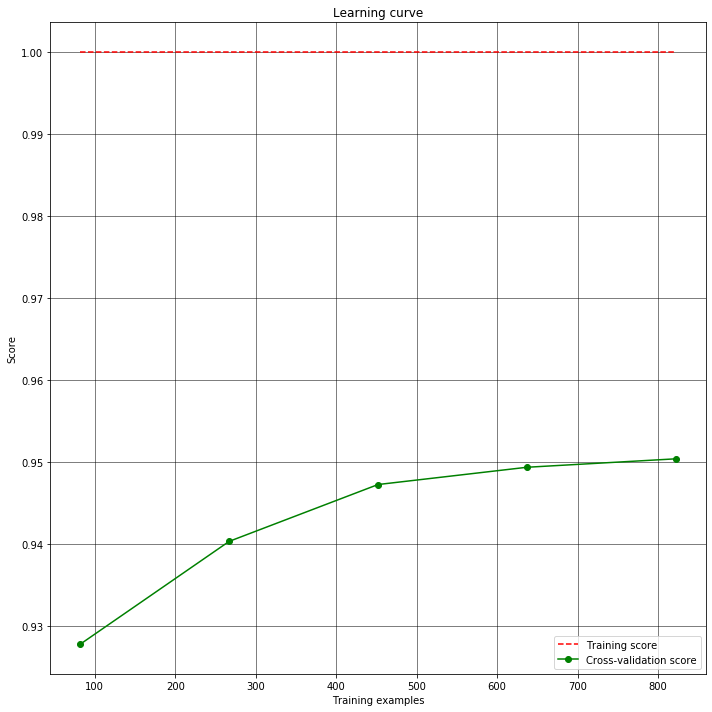

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1008 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 3568 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:    8.9s finished


Best parameters:{'estimator__base_estimator__criterion': 'mse', 'estimator__base_estimator__max_depth': 6, 'estimator__base_estimator__max_leaf_nodes': 20, 'estimator__base_estimator__min_samples_leaf': 20, 'estimator__base_estimator__min_samples_split': 10}
Best training accuracy:-23.96242084478743
Test set accuracy score for best params:0.8354099104142045
Best model Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('estimator',
                 RegressorChain(base_estimator=ExtraTreeRegressor(ccp_alpha=0.0,
                                                                  criterion='mse',
                                                                  max_depth=6,
                                                                  max_features='auto',
                                                                  max_leaf_nodes=20,
                                                            

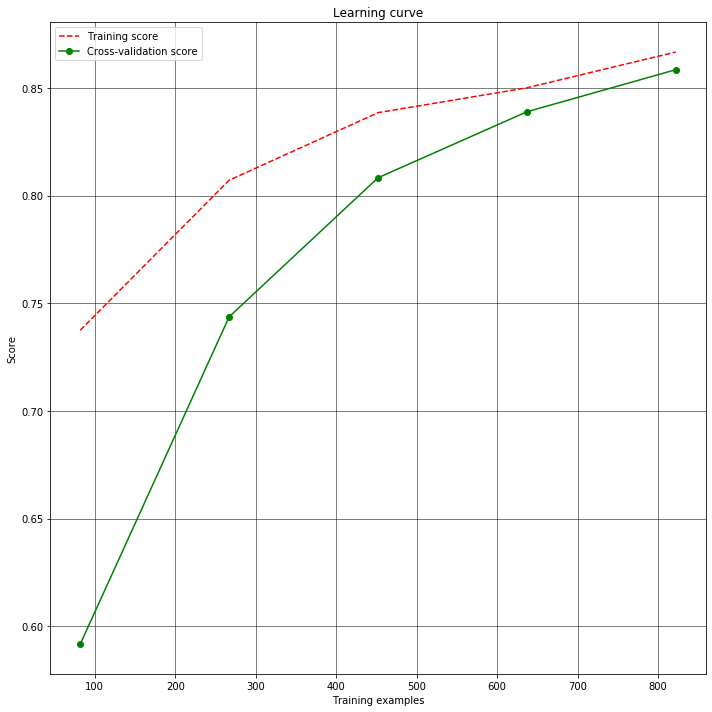

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 1008 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 1888 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 3856 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:   19.2s finished


Best parameters:{'estimator__base_estimator__criterion': 'mse', 'estimator__base_estimator__max_depth': 8, 'estimator__base_estimator__max_leaf_nodes': 100, 'estimator__base_estimator__min_samples_leaf': 20, 'estimator__base_estimator__min_samples_split': 10}
Best training accuracy:-23.185516021686578
Test set accuracy score for best params:0.8858595854280789
Best model Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('estimator',
                 RegressorChain(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                                     criterion='mse',
                                                                     max_depth=8,
                                                                     max_features=None,
                                                                     max_leaf_nodes=100,
                                            

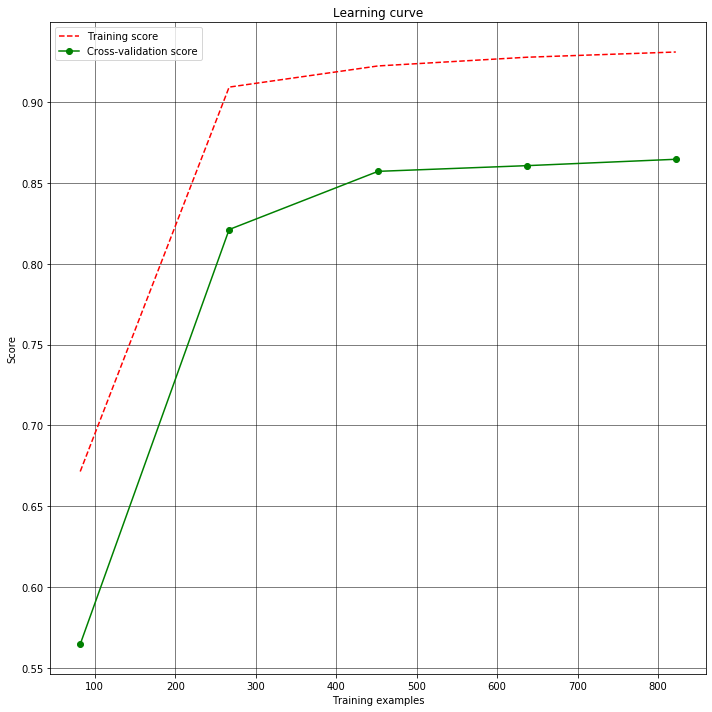

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 816 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 1425 out of 1440 | elapsed:   22.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:   22.4s finished


Best parameters:{'estimator__estimator__C': 10.0, 'estimator__estimator__epsilon': 1.0, 'estimator__estimator__gamma': 0.1, 'estimator__estimator__kernel': 'rbf'}
Best training accuracy:-8.060080745057805
Test set accuracy score for best params:0.946903270781067
Best model Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('estimator',
                 MultiOutputRegressor(estimator=SVR(C=10.0, cache_size=200,
                                                    coef0=0.0, degree=3,
                                                    epsilon=1.0, gamma=0.1,
                                                    kernel='rbf', max_iter=-1,
                                                    shrinking=True, tol=0.001,
                                                    verbose=False),
                                      n_jobs=None))],
         verbose=False)


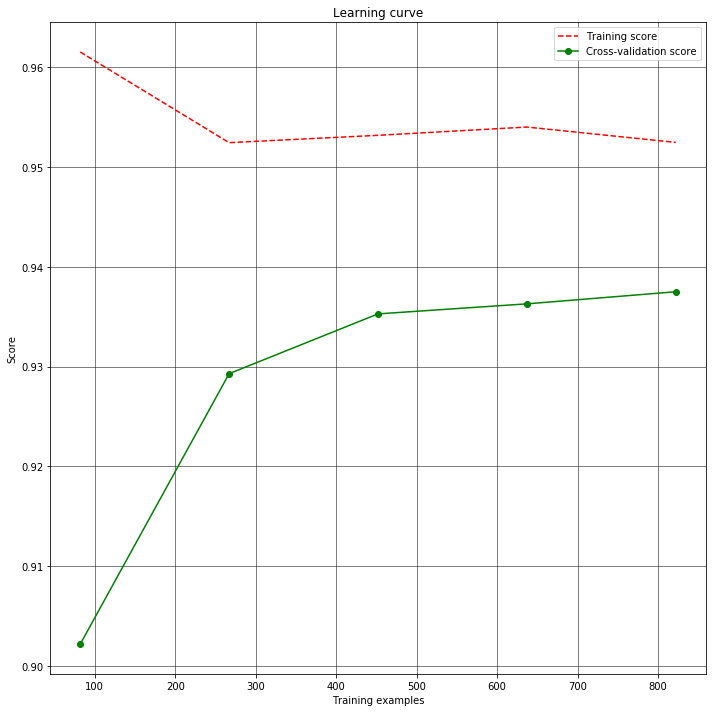

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 816 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 1396 tasks      | elapsed:   27.2s
[Parallel(n_jobs=-1)]: Done 1425 out of 1440 | elapsed:   27.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:   27.9s finished


Best parameters:{'estimator__base_estimator__C': 10.0, 'estimator__base_estimator__epsilon': 0.1, 'estimator__base_estimator__gamma': 0.1, 'estimator__base_estimator__kernel': 'rbf'}
Best training accuracy:-9.442567685204676
Test set accuracy score for best params:0.9399071852286248
Best model Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('estimator',
                 RegressorChain(base_estimator=SVR(C=10.0, cache_size=200,
                                                   coef0=0.0, degree=3,
                                                   epsilon=0.1, gamma=0.1,
                                                   kernel='rbf', max_iter=-1,
                                                   shrinking=True, tol=0.001,
                                                   verbose=False),
                                cv=None, order=None, random_state=None))],
         verbose=False)


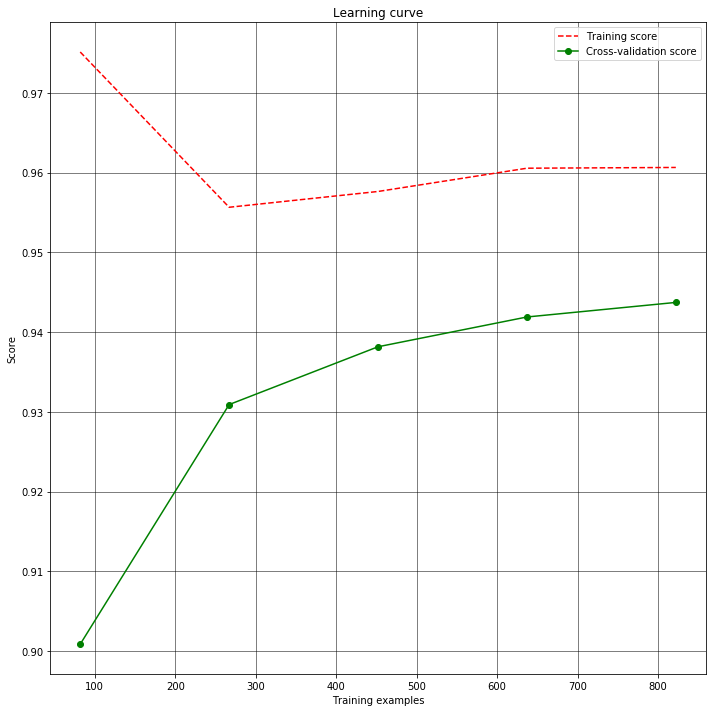

In [60]:
for i in range(len(regression_models)):
    Grid=GridSearchCV(estimator=regression_models[i], param_grid=parameters_list[i], scoring='neg_mean_squared_error',
                      n_jobs=-1, cv=10, verbose=3).fit(x_train, y_train)
    y_pred = Grid.predict(x_test)
    df_result = pd.DataFrame(Grid.cv_results_)
    # score for graph is R2
    train_sizes, train_scores, test_scores = learning_curve(Grid.best_estimator_, x_train, y_train, cv=10, n_jobs=5)

    print(f"Best parameters:{Grid.best_params_}")
    print(f"Best training accuracy:{Grid.best_score_}")
    print(f"Test set accuracy score for best params:{r2_score(y_test, y_pred)}" )
    print(f"Best model {Grid.best_estimator_}")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std  = np.std(train_scores, axis=1)
    test_scores_mean  = np.mean(test_scores, axis=1)
    test_scores_std   = np.std(test_scores, axis=1)
    fig, ax = plt.subplots(1, figsize=(6,6))
    ax.grid(linewidth='0.5',color='black')
    ax.set_axisbelow(True)
    plt.plot(train_sizes, train_scores_mean, '--', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")
    plt.title("Learning curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")                     
    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()
    
    
   

      

In [78]:
RegressorChain(SVR()).get_params()
MultiOutputRegressor(SVR()).get_params()

{'base_estimator__C': 1.0,
 'base_estimator__cache_size': 200,
 'base_estimator__coef0': 0.0,
 'base_estimator__degree': 3,
 'base_estimator__epsilon': 0.1,
 'base_estimator__gamma': 'scale',
 'base_estimator__kernel': 'rbf',
 'base_estimator__max_iter': -1,
 'base_estimator__shrinking': True,
 'base_estimator__tol': 0.001,
 'base_estimator__verbose': False,
 'base_estimator': SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
     kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
 'cv': None,
 'order': None,
 'random_state': None}